# Linear Model Assumptions

[Feature Engineering for Machine Learning Course](https://www.trainindata.com/p/feature-engineering-for-machine-learning)

Linear regression assumptions are:

- **Linearity**: The mean values of the outcome variable for each increment of the predictor(s) lie along a straight line. In other words, there is a linear relationship between predictors and target.

- **No perfect multicollinearity**: There should be no perfect linear relationship between two or more of the predictors. 

- **Normally distributed errors**: the residuals are random and normally distributed with a mean of 0.

- **Homoscedasticity**: At each level of the predictor variable(s), the variance of the residual terms should be constant.

Examples of linear models are:

- Linear and Logistic Regression

- Linear Discriminant Analysis (LDA)

**Failure to meet one or more of the model assumptions could end up in a poor model performance**.

If the assumptions are not met, we can:

- Use a different, no-linear model to predict the outcome from the variables.

- Transform the input variables so that they meet the assumptions.

## Performance of a linear model

To determine if a linear model fits the data well, we evaluate the residuals. The residuals should have a normal distribution with the mean centered at zero, and should be homoscedastic. If this is true, we can be fairly confident that the model is doing a good job.

The normal distribution can be assessed by Q-Q plots. Homoscedasticity can be assessed by residual plots.

We can also examine if there is a linear relationship between the predictors and the target with scatter-plots and residuals plots, and assess multi-colinearity with correlation matrices.

## When model assumptions are not met

Sometimes we can transform variables so that they meet the model assumptions. We normally do one of two things:

- Mathematical transformation of the variables

- Discretisation

**I will cover mathematical transformations and discretisation in later sections of the course**. 

## In this demo...

We will:

- Train a linear model to predict a target from a few predictor variables

- Evaluate if the model is accurate by examining the residuals

- Determine if the residuals are normally distributed

- Evaluate homoscedasticity

- Transform the data and see if this improves model performance

- Examine correlation and linear relationships between variables and target

In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import fetch_california_housing

# for linear regression
from sklearn.linear_model import LinearRegression

# to split and standardize the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# to evaluate the regression model
from sklearn.metrics import mean_squared_error

In [2]:
# load the California House price data from Scikit-learn
X, Y = fetch_california_housing(return_X_y=True, as_frame=True)

# Remove lat and lon
X.drop(["Latitude", "Longitude"], axis=1, inplace=True)

# display top 5 rows
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


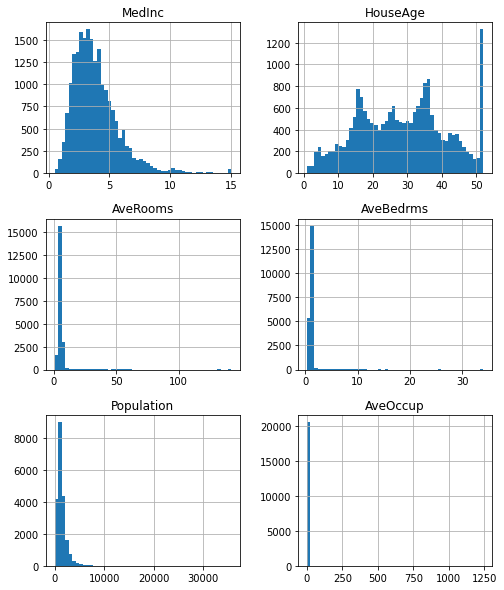

In [3]:
# Plot initial variable distributions:

X.hist(bins=50, figsize=(8, 10))
plt.show()

## Linear model 

In [4]:
# To train and evaluate a model, let's first split the data into
# train and test data:

X_train, X_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14448, 6), (6192, 6), (14448,), (6192,))

In [5]:
# Let's scale the features.
# This is a normal procedure for linear models.
# I will explain this later in the course.

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [6]:
# Let's train a linear model.

# Instantiate a linear model.
linreg = LinearRegression()

# Train the model.
linreg.fit(scaler.transform(X_train), y_train)

# Make predictions on the train set and calculate
# the mean squared error.
print('Train set')
pred = linreg.predict(scaler.transform(X_train))
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))

# Make predictions on the test set and calculate
# the mean squared error.
print('Test set')
pred = linreg.predict(scaler.transform(X_test))
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
print()

Train set
Linear Regression mse: 0.5987894249515697
Test set
Linear Regression mse: 0.6525344505004611



## Residuals

Residuals are the difference between the observed value and the predicted value.

In [7]:
# Calculate the residuals.

error = y_test - pred

## Residuals distribution

C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='MedHouseVal', ylabel='Count'>

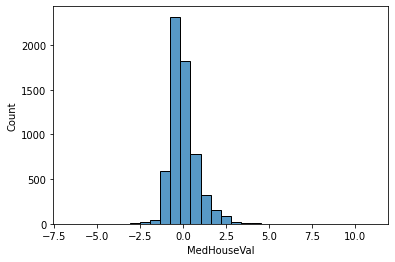

In [8]:
# We make a histogram to see if the residuals
# are normally distributed with mean value at 0.

sns.histplot(error, bins=30)

The residuals are centered at 0, and show a fairly normal distribution by visual inspection. 

There is some skew towards the left, with a few higher values towards the right of the distribution.

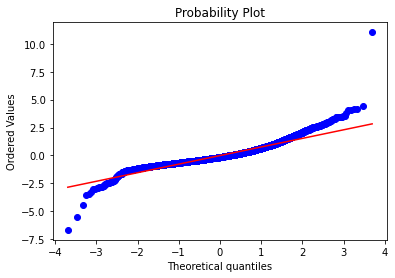

In [9]:
# We can also analyse the residuals distribution with 
# Q-Q plots. If the residuals are normally distributed
# the dots should adjust to the 45 degree line.

stats.probplot(error, dist="norm", plot=plt)
plt.show()

From the Q-Q plot, we see that the residuals deviate from the red line towards the tails of the distribution; thus, they are not normally distributed.

## Homoscedasticity

Homoscedasticity implies that the variance of the residual terms should be constant at each level of the predictor variable(s). So we need to plot the residuals against the variables.

Homoscedasticity, also known as homogeneity of variance, describes a situation in which the error term (that is, the "noise" in the relationship between the independent variables and the target) is the same across all values of the independent variables.

The way to identify if the variables are homoscedastic, is to make a linear model with all the independent variables involved, calculate the residuals, and plot the residuals vs. each of the independent variables. If the distribution of the residuals is homogeneous across the variable values, then the variables are homoscedastic.

There are other tests for homoscedasticity:

- Residuals plot

- Levene’s test

- Barlett’s test

- Goldfeld-Quandt Test

But those escape the scope of this course. So for this demo, I will focus on residual plot analysis.

In [10]:
X_train.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup'],
      dtype='object')

Text(0, 0.5, 'Residuals')

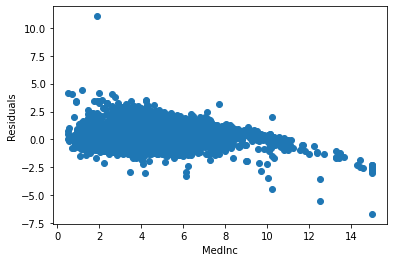

In [11]:
# Plot the residuals vs. one of the independent
# variables, MedInc (median income) in this case.

plt.scatter(x=X_test['MedInc'], y=error)
plt.xlabel('MedInc')
plt.ylabel('Residuals')

We see a clear lack of homocedasticity.

Text(0, 0.5, 'Residuals')

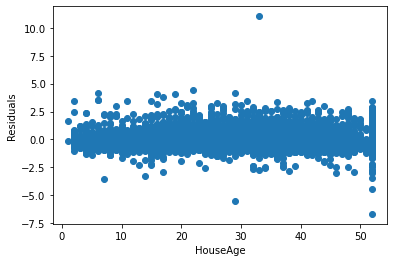

In [12]:
# Let's plot the residuals vs. HouseAge.

plt.scatter(x=X_test['HouseAge'], y=error)
plt.xlabel('HouseAge')
plt.ylabel('Residuals')

Here, the residuals show homocedasticity.

Text(0, 0.5, 'Residuals')

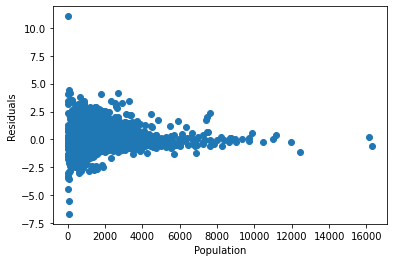

In [13]:
# Plot the residuals vs. one of the independent
# variables, Population in this case.

plt.scatter(x=X_test['Population'], y=error)
plt.xlabel('Population')
plt.ylabel('Residuals')

Again, we see a lack of homocedasticity, with more variance at lower population densities.

## Residual analysis with Yellowbrick

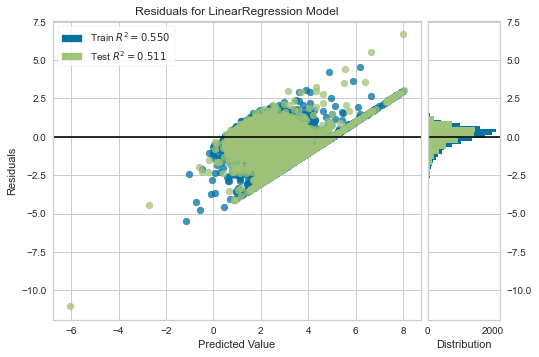

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [14]:
# I want to introduce Yellobrick,
# a library for visualisation of machine learning model 
# performance.

# if you don't have yellowbricks installed, comment out
# this cell to avoid errors while running the notebook.

# Yellowbrick allows you to visualise the residuals of the
# models after fitting a linear regression.

from yellowbrick.regressor import ResidualsPlot

linreg = LinearRegression()
linreg.fit(scaler.transform(X_train), y_train)
visualizer = ResidualsPlot(linreg)

visualizer.fit(scaler.transform(X_train), y_train)  # Fit the training data to the model
visualizer.score(scaler.transform(X_test), y_test)  # Evaluate the model on the test data
visualizer.poof()

On the left, we see the residuals vs. the predictions. This plot helps us understand if the residuals are homocedastic against the predictions.

On the right, we see the distribution of the residuals in the train and test sets. The residuals are not centered at 0, and the distributions are slightly skewed.

## Improving model fit

We will use various variance stabilizing transformations to improve value spread (more on this in a later section).

In [15]:
# Apply the box-cox transfoPopulationation to the variables.

X['MedInc'] = np.log(X['MedInc'])
X["AveRooms"] = 1 / X["AveRooms"]
X["AveBedrms"] = 1 / X["AveBedrms"]
X["AveOccup"] = 1 / X["AveOccup"]
X['Population'] = np.log(X['Population'])

# Let's separate the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14448, 6), (6192, 6), (14448,), (6192,))

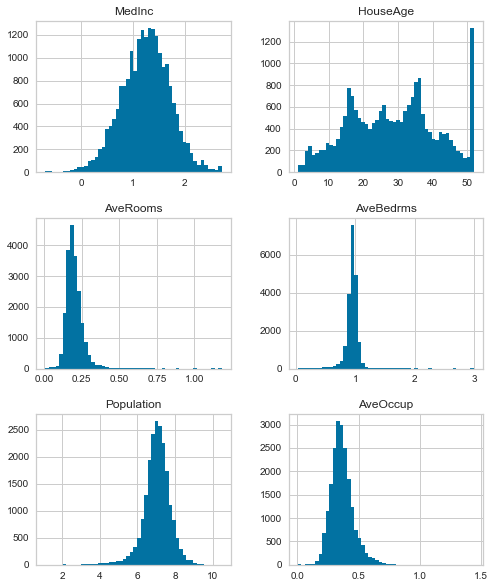

In [16]:
# Plot distributions after transformation
# (see that values are more evenly distributed)

X.hist(bins=50, figsize=(8,10))
plt.show()

In [17]:
# Let's scale the features.

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [18]:
# Model trained with the transformed variables.

# The model.
linreg = LinearRegression()

# Fit the model.
linreg.fit(scaler.transform(X_train), y_train)

# Make predictions and calculate the mean squared
# error over the train set.
print('Train set')
pred = linreg.predict(scaler.transform(X_train))
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))

# Make predictions and calculate the mean squared
# error over the test set.
print('Test set')
pred = linreg.predict(scaler.transform(X_test))
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
print()

Train set
Linear Regression mse: 0.5827343807084003
Test set
Linear Regression mse: 0.5885761677910881



## Residuals

In [19]:
# Calculate the residuals.

error = y_test - pred

## Residual distribution

C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='MedHouseVal', ylabel='Count'>

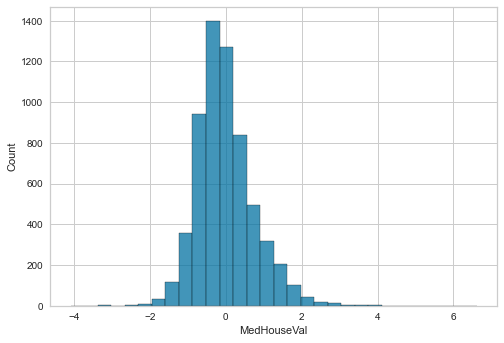

In [20]:
# We make a histogram to analyse the residuals'
# distribution.

sns.histplot(error, bins=30)

A tiny bit better, if anything else.

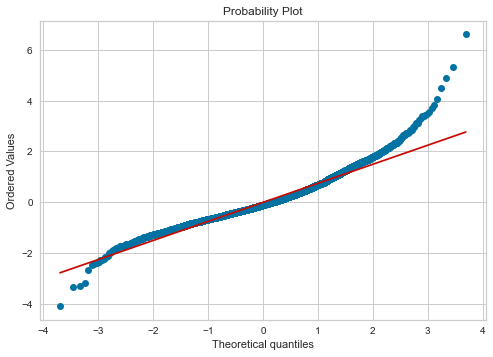

In [21]:
# We can also analise the residuals distribution with 
# a Q-Q plot. If the residuals are normally distributed
# the dots should follow the 45 degree line.

stats.probplot(error, dist="norm", plot=plt)
plt.show()

If we compare with the initial residuals Q-Q plot, towards the left tail, the residuals seem to deviate less.


## Yellowbrick

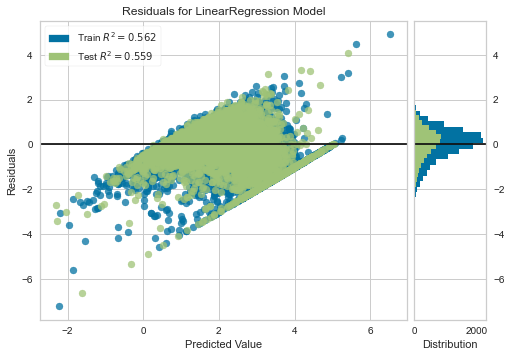

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [22]:
# Let's now do the analysis with yellowbrick.

from yellowbrick.regressor import ResidualsPlot

linreg = LinearRegression()
linreg.fit(scaler.transform(X_train), y_train)
visualizer = ResidualsPlot(linreg)

visualizer.fit(scaler.transform(X_train), y_train)  # Fit the training data to the model
visualizer.score(scaler.transform(X_test), y_test)  # Evaluate the model on the test data
visualizer.poof()

We can see a tiny improvement in the distribution of the residuals, which are centered at 0, and more evenly distributed towards the tails of the distribution.

**HOMEWORK**

Plot the residuals vs the transformed variables to determine homoscedasticity.

**NOTE**

The model performance could improve even further if we transformed the target as well. I leave that with you.

## Other model assumptions

To understand the relationships between predictor variables and the outcome, and predictor variables with themselves, we can evaluate the linear relationships and co-linearity.

First, I will show how the plots should look like using a toy dataframe with a variable that is linearly related to the target.

In [23]:
# I will create a dataframe with the variable x that
# follows a normal distribution and shows a
# linear relationship with y.

# This will provide the expected plots
# i.e., how the plots should look like if the
# assumptions are met.

np.random.seed(29) # for reproducibility

n = 200
x = np.random.randn(n)
y = x * 10 + np.random.randn(n) * 2

toy_df = pd.DataFrame([x, y]).T
toy_df.columns = ['x', 'y']
toy_df.head()

,x,y
0,-0.417482,-1.271561
1,0.706032,7.990600
2,1.915985,19.848687
3,-2.141755,-21.928903
4,0.719057,5.579070


## Linear relationship

We evaluate the linear assumption with scatter plots and residual plots. Scatter plots plot the change in the dependent variable y with the independent variable x.

### Scatter plots

Text(0.5, 22.960000000000022, 'Independent variable')

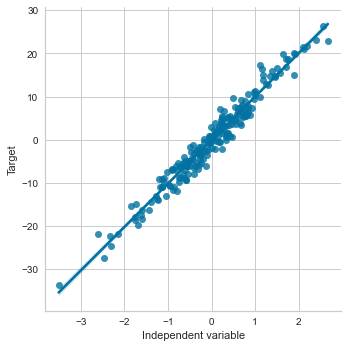

In [24]:
# With the toy data

# This is how the plot looks like when
# there is a linear relationship.

sns.lmplot(x="x", y="y", data=toy_df, order=1)
# order 1 indicates that we want seaborn to
# estimate a linear model (the line in the plot below)
# between x and y.

plt.ylabel('Target')
plt.xlabel('Independent variable')

In [25]:
len(X), len(y)

(20640, 200)

In [26]:
# Now let's use the California housing data set
# (remember that we transformed the variables already)

# add target to predictor dataframe
tmp = pd.concat([X, pd.Series(Y, name="price")], axis=1)

tmp.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,price
0,2.119287,41.0,0.143182,0.976744,5.774552,0.391304,4.526
1,2.116424,21.0,0.160304,1.028933,7.783641,0.473969,3.585
2,1.982022,52.0,0.120654,0.931579,6.206576,0.356855,3.521
3,1.730434,52.0,0.171900,0.931915,6.324359,0.392473,3.413
4,1.347086,52.0,0.159189,0.925000,6.336826,0.458407,3.422


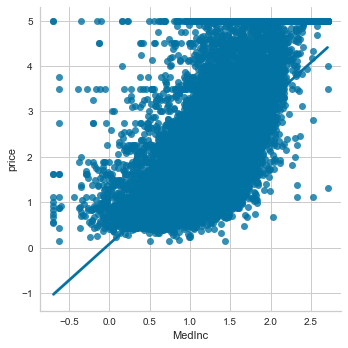

In [27]:
# plot
sns.lmplot(x="MedInc", y="price", data=tmp, order=1)

Not a clear linear relationship.

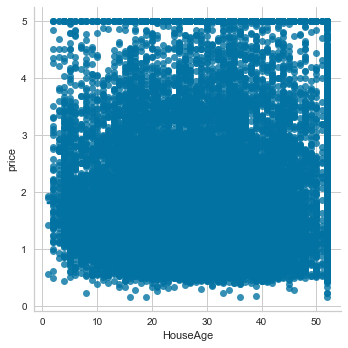

In [28]:
# Now we plot another variable

sns.lmplot(x="HouseAge", y="price", data=tmp, order=1)

Not a clear linear relationship.

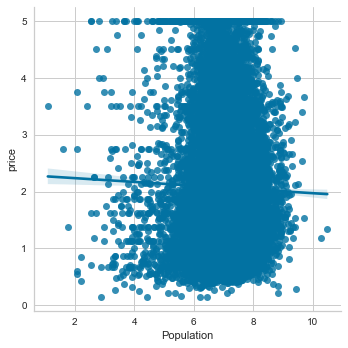

In [29]:
# Now we plot CRIM (per capita crime rate by town)
# vs. MEDV (median value of the house).

sns.lmplot(x="Population", y="price", data=tmp, order=1)

Meh.

**HOMEWORK**

Go ahead and compare the original relationships of the variables with the target. That is, before the transformation.

## Multicolinearity

To determine co-linearity, we evaluate the correlation of independent variables.

In [30]:
# Capture features in a list.

features = X_train.columns.to_list()

features

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

<Axes: >

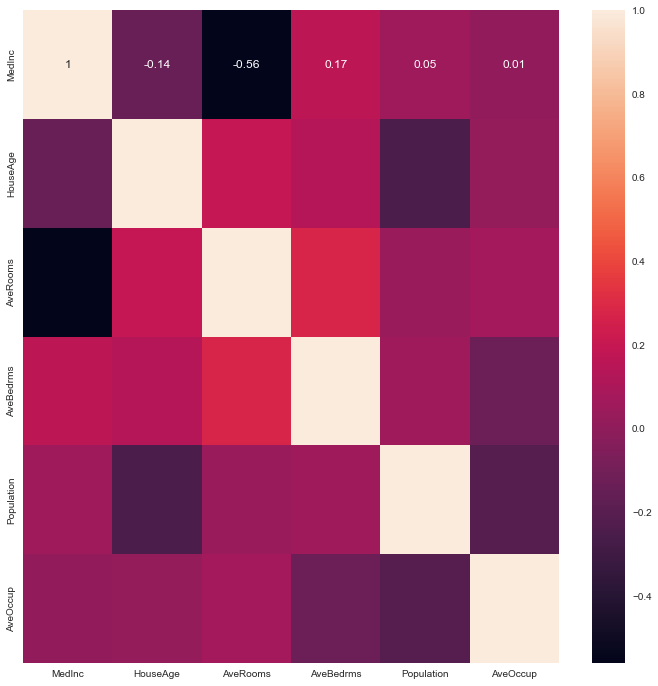

In [31]:
# We calculate the correlations using pandas corr()
# and we round the values to 2 decimals.
correlation_matrix = X_train.corr().round(2)

# Plot the correlation matrix usng seaborn.
# We use annot = True to print the correlation values
# inside the squares.

figure = plt.figure(figsize=(12, 12))
sns.heatmap(data=correlation_matrix, annot=True)

The variables do not show colinearity. Most correlation coefficients are below 0.5 (the absolute value).